# Regression Trees and Model Optimization - Lab

## Introduction

In this lab, we'll see how to apply regression analysis using CART trees while making use of some hyperparameter tuning to improve our model. 

## Objectives

In this lab you will: 

- Perform the full process of cleaning data, tuning hyperparameters, creating visualizations, and evaluating decision tree models 
- Determine the optimal hyperparameters for a decision tree model and evaluate the performance of decision tree models

## Ames Housing dataset 

The dataset is available in the file `'ames.csv'`. 

- Import the dataset and examine its dimensions: 

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv('ames.csv')

# Print the dimensions of data
print('Dataset shape: ', data.shape)

# Check out the info for the dataframe
print(data.info())

# Show the first 5 rows
print(data.head())

Dataset shape:  (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-n

## Identify features and target data 

In this lab, we will use using 3 predictive continuous features:

#### Features

- `LotArea`: Lot size in square feet
- `1stFlrSF`: Size of first floor in square feet
- `GrLivArea`: Above grade (ground) living area square feet

#### Target

- `SalePrice`', the sale price of the home, in dollars

- Create DataFrames for the features and the target variable as shown above 
- Inspect the contents of both the features and the target variable

In [7]:
# Features and target data
target = data['SalePrice']
features = data[['LotArea','1stFlrSF','GrLivArea']]

print('Target data description: ', target.describe())
print('')
print('Feature data description: ', features.describe())

Target data description:  count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Feature data description:               LotArea     1stFlrSF    GrLivArea
count    1460.000000  1460.000000  1460.000000
mean    10516.828082  1162.626712  1515.463699
std      9981.264932   386.587738   525.480383
min      1300.000000   334.000000   334.000000
25%      7553.500000   882.000000  1129.500000
50%      9478.500000  1087.000000  1464.000000
75%     11601.500000  1391.250000  1776.750000
max    215245.000000  4692.000000  5642.000000


## Inspect correlations 

- Use scatter plots to show the correlation between the chosen features and the target variable
- Comment on each scatter plot 

All 3 features show a positive correlation with SalePrice


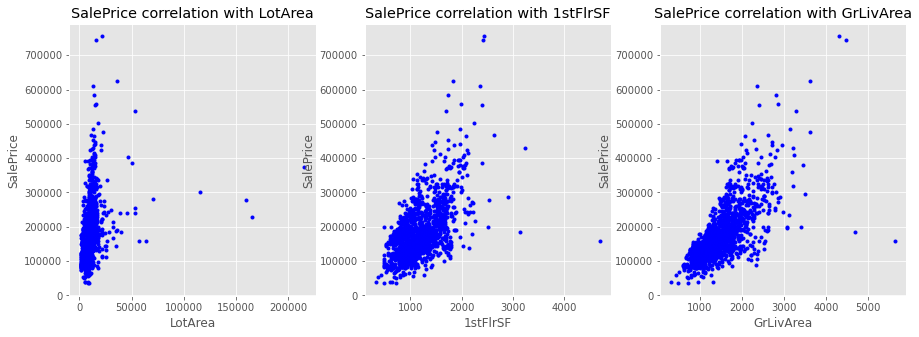

In [9]:
# Your code here
feature_list = ['LotArea','1stFlrSF','GrLivArea']

fig,ax = plt.subplots(1, 3, figsize=(15,5))
for n, feature in enumerate(feature_list):
    ax[n].plot(features[feature], target, 'b.')
    ax[n].set_xlabel(feature)
    ax[n].set_ylabel('SalePrice')
    ax[n].set_title('SalePrice correlation with ' + feature)

print('All 3 features show a positive correlation with SalePrice')

## Create evaluation metrics

- Import `r2_score` and `mean_squared_error` from `sklearn.metrics` 
- Create a function `performance(true, predicted)` to calculate and return both the R-squared score and Root Mean Squared Error (RMSE) for two equal-sized arrays for the given true and predicted values 
    - Depending on your version of sklearn, in order to get the RMSE score you will need to either set `squared=False` or you will need to take the square root of the output of the `mean_squared_error` function - check out [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) or this helpful and related [StackOverflow post](https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python)
    - The benefit of calculating RMSE instead of the Mean Squared Error (MSE) is that RMSE is in the same units at the target - here, this means that RMSE will be in dollars, calculating how far off in dollars our predictions are away from the actual prices for homes, on average

In [11]:
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2_value = r2_score(y_true, y_predict)
    
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = np.sqrt(mean_squared_error(y_true, y_predict))
    
    # Return the score

    return [r2_value, rmse]


# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

# [0.9228556485355649, 0.6870225614927066]

[0.9228556485355649, 0.6870225614927066]

## Split the data into training and test sets

- Split `features` and `target` datasets into training/test data (80/20) 
- For reproducibility, use `random_state=42`

In [12]:
from sklearn.model_selection import train_test_split 

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Grow a vanilla regression tree

- Import the `DecisionTreeRegressor` class
- Run a baseline model for later comparison using the datasets created above
- Generate predictions for test dataset and calculate the performance measures using the function created above 
- Use `random_state=45` for tree instance
- Record your observations

In [14]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.5961521990414137, 55656.48543887347] - R2, RMSE

[0.5961521990414137, 55656.48543887347]

## Hyperparameter tuning (I)

- Find the best tree depth using depth range: 1-30
- Run the regressor repeatedly in a `for` loop for each depth value  
- Use `random_state=45` for reproducibility
- Calculate RMSE and r-squared for each run 
- Plot both performance measures for all runs 
- Comment on the output 

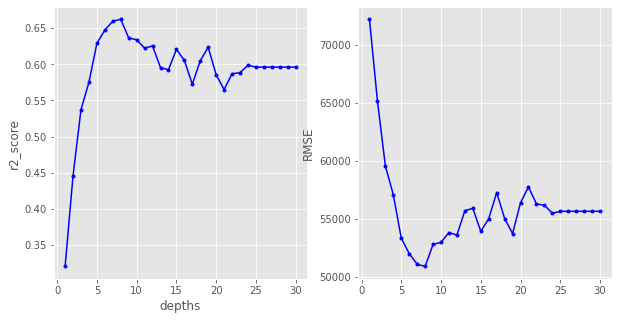

In [20]:
# Your code here 
depths = np.arange(1,31)
runs = np.zeros((depths.shape[0],2))

for n, depth in enumerate(depths):
    regressor = DecisionTreeRegressor(random_state=45, max_depth=depth)
    regressor.fit(x_train, y_train)
    score = performance(y_test, regressor.predict(x_test))
    runs[n,0] = score[0]
    runs[n,1] = score[1]

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(depths,runs[:,0],'b.-')
ax[0].set_xlabel('depths')
ax[0].set_ylabel('r2_score')
ax[1].plot(depths,runs[:,1],'b.-')
ax[1].set_label('depths')
ax[1].set_ylabel('RMSE');

In [21]:
"""Max_depth of 8 is optimal, as this yields the highest r2_score and minimum RMSE across all evaluation runs."""

'Max_depth of 8 is optimal, as this yields the highest r2_score and minimum RMSE across all evaluation runs.'

## Hyperparameter tuning (II)

- Repeat the above process for `min_samples_split` 
- Use a range of values from 2-10 for this hyperparameter 
- Use `random_state=45` for reproducibility
- Visualize the output and comment on results as above 

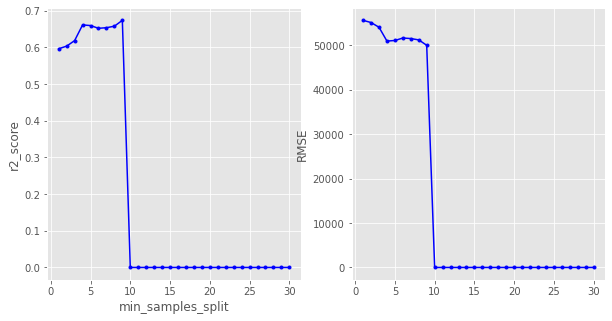

In [22]:
# Your code here 
param_name = 'min_samples_split'
params = np.arange(2,11)
runs = np.zeros((depths.shape[0],2))

for n, param in enumerate(params):
    regressor = DecisionTreeRegressor(random_state=45, min_samples_split=param)
    regressor.fit(x_train, y_train)
    score = performance(y_test, regressor.predict(x_test))
    runs[n,0] = score[0]
    runs[n,1] = score[1]

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(depths,runs[:,0],'b.-')
ax[0].set_xlabel(param_name)
ax[0].set_ylabel('r2_score')
ax[1].plot(depths,runs[:,1],'b.-')
ax[1].set_label(param_name)
ax[1].set_ylabel('RMSE');

In [23]:
"""Min samples split of up to 9 is the optimal value, as anything larger yields very poor r2_scores."""

'Min samples split of up to 9 is the optimal value, as anything larger yields very poor r2_scores.'

# Run the *optimized* model 

- Use the best values for `max_depth` and `min_samples_split` found in previous runs and run an optimized model with these values 
- Calculate the performance and comment on the output 

In [24]:
# Your code here 
regressor = DecisionTreeRegressor(random_state=45, min_samples_split=9, max_depth = 8)
regressor.fit(x_train, y_train)
score = performance(y_test, regressor.predict(x_test))
print('r2_score of model: {:.3f}'.format(score[0]))
print('RMSE of model: {:.2f}'.format(score[1]))

r2_score of model: 0.680
RMSE of model: 49560.22


In [25]:
"""This model performs as well or better than any of the models we explored in our 1D scans of the hyperparameter space."""

'This model performs as well or better than any of the models we explored in our 1D scans of the hyperparameter space.'

## Level up (Optional)

- How about bringing in some more features from the original dataset which may be good predictors?
- Also, try tuning more hyperparameters like `max_features` to find a more optimal version of the model 

In [27]:
# Your code here 
features = data[['LotArea','1stFlrSF','GrLivArea','YearBuilt','FullBath','TotRmsAbvGrd']]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=45, min_samples_split=9, max_depth = 8)
regressor.fit(x_train, y_train)
score = performance(y_test, regressor.predict(x_test))
print('r2_score of model with added features: {:.3f}'.format(score[0]))
print('RMSE of model with added features: {:.2f}'.format(score[1]))



r2_score of model with added features: 0.787
RMSE of model with added features: 40452.04


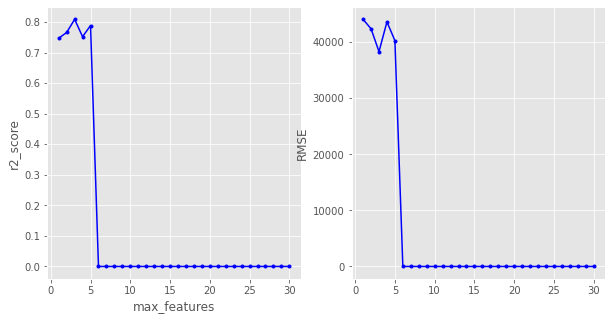

In [28]:
param_name = 'max_features'
params = np.arange(1,6)
runs = np.zeros((depths.shape[0],2))

for n, param in enumerate(params):
    regressor = DecisionTreeRegressor(random_state=45, max_features=param)
    regressor.fit(x_train, y_train)
    score = performance(y_test, regressor.predict(x_test))
    runs[n,0] = score[0]
    runs[n,1] = score[1]

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(depths,runs[:,0],'b.-')
ax[0].set_xlabel(param_name)
ax[0].set_ylabel('r2_score')
ax[1].plot(depths,runs[:,1],'b.-')
ax[1].set_label(param_name)
ax[1].set_ylabel('RMSE');

In [29]:
# Your code here 
features = data[['LotArea','1stFlrSF','GrLivArea','YearBuilt','FullBath','TotRmsAbvGrd']]
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=45, min_samples_split=9, max_depth = 8, max_features=3)
regressor.fit(x_train, y_train)
score = performance(y_test, regressor.predict(x_test))
print('r2_score of model with added features: {:.3f}'.format(score[0]))
print('RMSE of model with added features: {:.2f}'.format(score[1]))



r2_score of model with added features: 0.781
RMSE of model with added features: 40939.92


## Summary 

In this lab, we looked at applying a decision-tree-based regression analysis on the Ames Housing dataset. We saw how to train various models to find the optimal values for hyperparameters. 